In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from datetime import datetime

In [61]:
# Data-Set importing the Dataset: SGEMM GPU kernel performance Data Set
df_gpu_kernel = pd.read_csv("sgemm_product.csv")
print(df_gpu_kernel.isnull().sum())
df_gpu_kernel.info()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 

In [62]:
df_gpu_kernel.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [63]:
#Preparing the final dataset
X = df_gpu_kernel[df_gpu_kernel.columns[:-5]] 
y = (df_gpu_kernel['Run1 (ms)']+df_gpu_kernel['Run2 (ms)']+df_gpu_kernel['Run3 (ms)']+df_gpu_kernel['Run4 (ms)'])/4

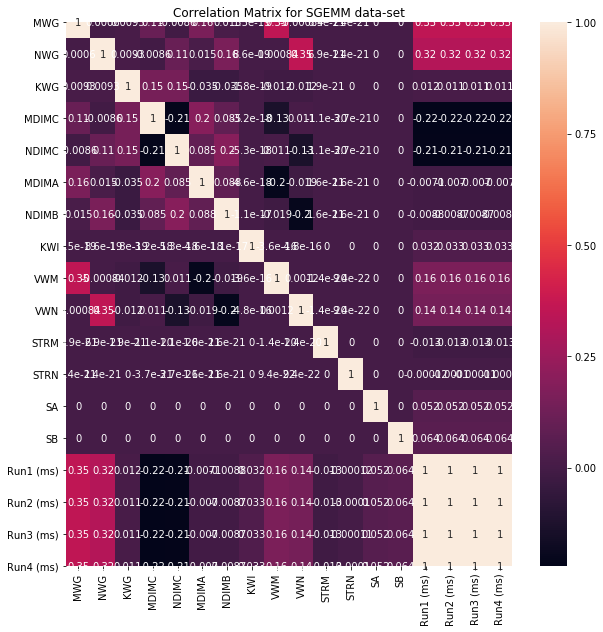

In [64]:
#Analysing Correlation between various features of the wine dataset
gpu_corr = df_gpu_kernel.corr()
figure, ax = plt.subplots(figsize = (10,10))
ax.set_title('Correlation Matrix for SGEMM data-set')
matrix = sns.heatmap(gpu_corr,ax=ax, annot= True)

In [65]:
#Creating Traning and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [66]:
def svr_param_selection(X, y, X_test, y_test, nfolds):
    Kernels = ['poly', 'rbf']
    Cs = [0.001, 0.01]
    Gammas = [0.001, 0.1]
    param_grid = {'kernel':Kernels, 'C': Cs, 'gamma' : Gammas}
#     grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search = SVR()
    grid_search.fit(X, y)
    print('SVR MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('SVR With Parameters: '+str(grid_search))    
    print('SVR coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for SVR on test set: '+str(mean_squared_error(y_test, y_pred)))

In [67]:
def random_forest_regressor_param_selection(X, y, X_test, y_test, nfolds):
    grid_search = RandomForestRegressor(random_state=0)
    grid_search.fit(X, y)
    print('RandomForestRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('RandomForestRegressor With Parameters: '+str(grid_search))    
    print('RandomForestRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for RandomForestRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [68]:
def decision_tree_regressor_param_selection(X, y, X_test, y_test, nfolds):
    grid_search = DecisionTreeRegressor(random_state=0)
    grid_search.fit(X, y)
    print('DecisionTreeRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('DecisionTreeRegressor With Parameters: '+str(grid_search))    
    print('DecisionTreeRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for DecisionTreeRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [69]:
def ada_boost_regressor_param_selection(X, y, X_test, y_test, nfolds):
    grid_search = AdaBoostRegressor(random_state=0)
    grid_search.fit(X, y)
    print('AdaBoostRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('AdaBoostRegressor With Parameters: '+str(grid_search))    
    print('AdaBoostRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for AdaBoostRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [70]:
def gaussian_regressor_param_selection(X, y, X_test, y_test, nfolds):
    print('Skipped due to poor accuracy')
#     grid_search = GaussianProcessRegressor(random_state=0)
#     grid_search.fit(X, y)
#     print('GaussianProcessRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
#     print('GaussianProcessRegressor With Parameters: '+str(grid_search))    
#     print('GaussianProcessRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
#     y_pred = grid_search.predict(X_test)
#     print('MSE for GaussianProcessRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [71]:
def linear_regressor_param_selection(X, y, X_test, y_test, nfolds):
    grid_search = LinearRegression()
    grid_search.fit(X, y)
    print('LinearRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('LinearRegressor With Parameters: '+str(grid_search))    
    print('LinearRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for LinearRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [72]:
def neural_network_regressor_param_selection(X, y, X_test, y_test, nfolds):
    grid_search = MLPRegressor(random_state=0)
    grid_search.fit(X, y)
    print('NeuralNetworkRegressor MSE Score for training data: '+str(grid_search.score(X_test, y_test)))
    print('NeuralNetworkRegressor With Parameters: '+str(grid_search))    
    print('NeuralNetworkRegressor coefficient of determination R^2 on test data: '+str(grid_search.score(X_test, y_test)))
    y_pred = grid_search.predict(X_test)
    print('MSE for NeuralNetworkRegressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [73]:
#Using the 3-Fold HyperParam Search to evaluate the best hyperparams for each model
print('Due to the strict 3 minute rule, we have skipped the k-fold validation for large datasets like these and skipped SVR')
print("now ="+str(datetime.now()))
linear_best_param         = linear_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print()
print("now ="+str(datetime.now()))
random_forest_best_param = random_forest_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print()
print("now ="+str(datetime.now()))
decision_tree_best_param = decision_tree_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print()
print("now ="+str(datetime.now()))
ada_boost_best_param     = ada_boost_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print()
print("now ="+str(datetime.now()))
neural_network_best_param = neural_network_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print()
print("now ="+str(datetime.now()))
gaussian_best_param       = gaussian_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
# svr_best_param           = svr_param_selection(X_train, y_train, X_test, y_test, 3)

Due to the strict 3 minute rule, we have skipped the k-fold validation for large datasets like these and skipped SVR
now =2019-12-05 20:52:41.898776
LinearRegressor MSE Score for training data: 0.3984555419443505
LinearRegressor With Parameters: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegressor coefficient of determination R^2 on test data: 0.3984555419443505
MSE for LinearRegressor on test set: 79999.08736210375

now =2019-12-05 20:52:41.951323


C:\Users\karth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor MSE Score for training data: 0.7687648450530112
RandomForestRegressor With Parameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
RandomForestRegressor coefficient of determination R^2 on test data: 0.7687648450530112
MSE for RandomForestRegressor on test set: 30751.844047547398

now =2019-12-05 20:52:45.464530
DecisionTreeRegressor MSE Score for training data: 0.6616907633999174
DecisionTreeRegressor With Parameters: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=